In [1]:
import numpy as np
import sympy as sp

In [2]:
from sympy.abc import x

定義內積 和norm

##  $1.<f,g>\  f,g\ are\ belong\ to\ cotinuous\ function$

In [41]:
def inner_product(f,g):
    return sp.integrate(f*g, (x, -1*sp.pi, sp.pi))
def norm(f):
    return inner_product(f,f)

In [134]:
inner_product(1, x**2)

2*pi**3/3

In [43]:
norm(x**2)

0.632455532033676*pi**2.5

定義orthogonalization 和normalization

然後完成 G-S procedure

In [214]:
def Orth(b):
    w = []
    for i in range(len(b)):
        if i ==0:
            w.append(b[i])
        else:
            w_i = b[i]
            for j in range(i):
                c = sp.S(inner_product(w_i, w[j])/inner_product(w[j], w[j])) 
                w_i = w_i - c*w[j]
                        
            w_i = sp.expand_func(w_i)
            w.append(w_i)
    
    return w

def Nor(w):
    return [u/norm(u) for u in w ]

def GSP(b):
    return Nor(Orth(b))

In [216]:
O = Orth([x**i for i in range(4)])
O

[1, x, x**2 - pi**2/3, x**3 - 3*pi**2*x/5]

In [211]:
Nor([x**i for i in range(3)])

[0.707106781186547*pi**(-0.5),
 1.22474487139159*pi**(-1.5)*x,
 1.58113883008419*pi**(-2.5)*x**2]

In [217]:
GSP([x**i for i in range(6)])

[0.707106781186547*pi**(-0.5),
 1.22474487139159*pi**(-1.5)*x,
 2.37170824512628*pi**(-2.5)*(x**2 - pi**2/3),
 4.67707173346743*pi**(-3.5)*(x**3 - 3*pi**2*x/5),
 9.28077650307344*pi**(-4.5)*(x**4 - 6*pi**2*(x**2 - pi**2/3)/7 - pi**4/5),
 18.4685120543048*pi**(-5.5)*(x**5 - 3*pi**4*x/7 - 10*pi**2*(x**3 - 3*pi**2*x/5)/9)]

## $2.G-S\ procedure\ \{1,X,X_2,...,X_5\}$

In [218]:
ONB = GSP([x**i for i in range(6)])
for i in ONB:
    sp.pretty_print(i)

                   -0.5
0.707106781186547⋅π    
                  -1.5  
1.22474487139159⋅π    ⋅x
                       ⎛      2⎞
                  -2.5 ⎜ 2   π ⎟
2.37170824512628⋅π    ⋅⎜x  - ──⎟
                       ⎝     3 ⎠
                       ⎛        2  ⎞
                  -3.5 ⎜ 3   3⋅π ⋅x⎟
4.67707173346743⋅π    ⋅⎜x  - ──────⎟
                       ⎝       5   ⎠
                       ⎛          ⎛      2⎞     ⎞
                       ⎜        2 ⎜ 2   π ⎟     ⎟
                       ⎜     6⋅π ⋅⎜x  - ──⎟    4⎟
                  -4.5 ⎜ 4        ⎝     3 ⎠   π ⎟
9.28077650307344⋅π    ⋅⎜x  - ────────────── - ──⎟
                       ⎝           7          5 ⎠
                       ⎛                    ⎛        2  ⎞⎞
                       ⎜                  2 ⎜ 3   3⋅π ⋅x⎟⎟
                       ⎜        4     10⋅π ⋅⎜x  - ──────⎟⎟
                  -5.5 ⎜ 5   3⋅π ⋅x         ⎝       5   ⎠⎟
18.4685120543048⋅π    ⋅⎜x  - ────── - ───────────────────⎟
                       ⎝   

定義 正交投影

In [222]:
def projection(v, onb):
    w = 0
    for i in onb:
        w =  w + inner_product(v, i)*i
    return w

## $3. P_U(sin(x)),\ U=\mathcal{P}_5(\mathbb{R}) $

In [312]:
f = projection(sp.sin(x), ONB)

In [313]:
sp.expand(f)

-9095.625*pi**(-8.0)*x**5 + 86.625*pi**(-6.0)*x**5 + 81860.625*pi**(-10.0)*x**5 - 90956.25*pi**(-8.0)*x**3 - 78.75*pi**(-4.0)*x**3 + 9843.75*pi**(-6.0)*x**3 - 2008.125*pi**(-4.0)*x + 13.125*pi**(-2.0)*x + 19490.625*pi**(-6.0)*x

bonus 1: 畫圖，與sinx 做比較

In [229]:
import matplotlib.pyplot as plt

In [231]:
g = sp.lambdify(x, f, 'numpy')

In [253]:
l1 = np.linspace(-1*np.pi, 1*np.pi, 500)
l2 = np.linspace(-2*np.pi, 2*np.pi, 500)
l3 = np.linspace(-3*np.pi, 3*np.pi, 500)
l4 = np.linspace(-4*np.pi, 4*np.pi, 500)

<Figure size 432x288 with 0 Axes>

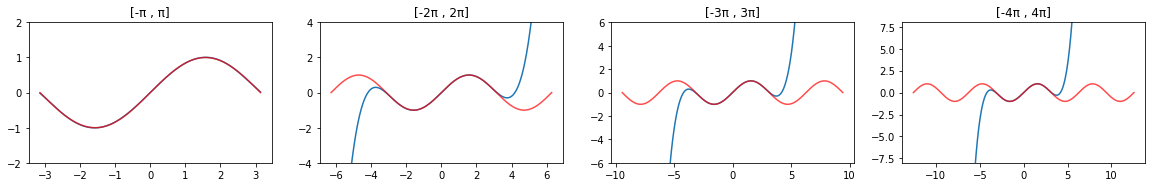

In [285]:
fg = plt.figure()
plt.figure(figsize=[20,32])

fg = plt.subplot(141)
ax = plt.gca()
ax.set_aspect('equal')
plt.ylim(-2,2)
fg.plot(l1, g(l1))
fg.plot(l1, np.sin(l1), c='r', alpha=0.7)
plt.title("[-π , π]")

fg = plt.subplot(142)
ax = plt.gca()
ax.set_aspect('equal')
plt.ylim(-4,4)
fg.plot(l2, g(l2))
fg.plot(l2, np.sin(l2), c='r', alpha=0.7)
plt.title("[-2π , 2π]")


fg = plt.subplot(143)
ax = plt.gca()
plt.ylim(-6,6)
fg.plot(l3, g(l3))
fg.plot(l3, np.sin(l3), c='r', alpha=0.7)
ax.set_aspect('equal')
plt.title("[-3π , 3π]")


fg = plt.subplot(144)
ax = plt.gca()
plt.ylim(-8,8)
fg.plot(l4, g(l4))
fg.plot(l4, np.sin(l4), c='r', alpha=0.7)
ax.set_aspect('equal')
plt.title("[-4π , 4π]")

plt.show()

bonus 2 :畫圖，與馬克勞林級數做比較

In [304]:
M = 0
for i in range(6):
    m = sp.sin(x)
    for j in range(1,i+1):
        m = sp.S(sp.diff(m, x)/j)
    m = m.subs(x,0) 
    M = M+ m*x**i

In [305]:
M

x**5/120 - x**3/6 + x

In [306]:
h = sp.lambdify(x, M, 'numpy')

<Figure size 432x288 with 0 Axes>

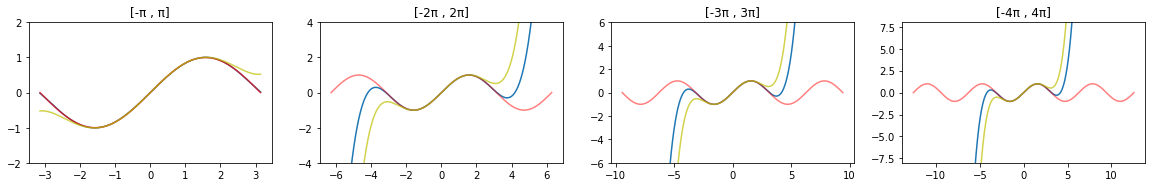

In [311]:
fg = plt.figure()
plt.figure(figsize=[20,32])

fg = plt.subplot(141)
ax = plt.gca()
ax.set_aspect('equal')
plt.ylim(-2,2)
fg.plot(l1, g(l1))
fg.plot(l1, np.sin(l1), c='r', alpha=0.7)
fg.plot(l1, h(l1), c='y', alpha=0.7)
plt.title("[-π , π]")

fg = plt.subplot(142)
ax = plt.gca()
ax.set_aspect('equal')
plt.ylim(-4,4)
fg.plot(l2, g(l2))
fg.plot(l2, np.sin(l2), c='r', alpha=0.5)
fg.plot(l2, h(l2), c='y', alpha=0.7)
plt.title("[-2π , 2π]")


fg = plt.subplot(143)
ax = plt.gca()
plt.ylim(-6,6)
fg.plot(l3, g(l3))
fg.plot(l3, np.sin(l3), c='r', alpha=0.5)
fg.plot(l3, h(l3), c='y', alpha=0.7)
ax.set_aspect('equal')
plt.title("[-3π , 3π]")


fg = plt.subplot(144)
ax = plt.gca()
plt.ylim(-8,8)
fg.plot(l4, g(l4))
fg.plot(l4, np.sin(l4), c='r', alpha=0.5)
fg.plot(l4, h(l4), c='y', alpha=0.7)
ax.set_aspect('equal')
plt.title("[-4π , 4π]")

plt.show()